In [50]:
import os
import numpy as np
import pandas as pd

In [41]:
from sklearn.model_selection import train_test_split

In [29]:
BASE_DIR = 'data'

RATINGS_CSV = 'ratings.csv'
USERS_CSV = 'users.csv'
MOVIES_CSV = 'movies.csv'

In [20]:
ratings = pd.read_csv(os.path.join(BASE_DIR, RATINGS_CSV))

In [27]:
users = pd.read_csv(os.path.join(BASE_DIR, USERS_CSV))

In [88]:
num_users = users.userid.max()

In [30]:
movies = pd.read_csv(os.path.join(BASE_DIR, MOVIES_CSV))

In [86]:
num_movies = movies.movieid.max()

In [89]:
num_users, num_movies

(6040, 3952)

In [43]:
train_df, test_df = train_test_split(ratings,
                                     stratify=ratings['userid'],
                                     test_size=0.1,
                                     random_state=1)

In [46]:
len(train_df), len(test_df)

(900188, 100021)

In [90]:
train_np = np.zeros((num_users, num_movies))

In [92]:
for (_, _, userid, movieid, rating) in ratings.itertuples():
    train_np[userid - 1, movieid - 1] = rating

In [93]:
train_np.shape

(6040, 3952)

## Model

In [94]:
import keras
from keras import Input, Model
from keras import regularizers
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import Adam, RMSprop

In [95]:
inputs = Input(shape=(train_np.shape[1],), name='UserRating')
x = Dense(500, activation='relu', name='LatentSpace', kernel_regularizer=regularizers.l2(0.0005))(inputs)
outputs = Dense(train_np.shape[1], activation='relu', name='UserScorePred', kernel_regularizer=regularizers.l2(0.0005))(x)
model = Model(inputs, outputs)

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserRating (InputLayer)      (None, 3952)              0         
_________________________________________________________________
LatentSpace (Dense)          (None, 500)               1976500   
_________________________________________________________________
UserScorePred (Dense)        (None, 3952)              1979952   
Total params: 3,956,452
Trainable params: 3,956,452
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer = Adam(lr=0.0001), loss=keras.metrics.mean_squared_error)

## Training

In [112]:
train_hist = model.fit(x=train_np, y=train_np,
                  epochs=50,
                  batch_size=256,
                  verbose = 2, 
                  validation_split=0.1)

Train on 5436 samples, validate on 604 samples
Epoch 1/50
 - 0s - loss: 0.7988 - val_loss: 0.7804
Epoch 2/50
 - 0s - loss: 0.7312 - val_loss: 0.7199
Epoch 3/50
 - 0s - loss: 0.6741 - val_loss: 0.6693
Epoch 4/50
 - 0s - loss: 0.6263 - val_loss: 0.6267
Epoch 5/50
 - 0s - loss: 0.5862 - val_loss: 0.5911
Epoch 6/50
 - 0s - loss: 0.5528 - val_loss: 0.5611
Epoch 7/50
 - 0s - loss: 0.5244 - val_loss: 0.5355
Epoch 8/50
 - 0s - loss: 0.5003 - val_loss: 0.5137
Epoch 9/50
 - 0s - loss: 0.4799 - val_loss: 0.4956
Epoch 10/50
 - 0s - loss: 0.4628 - val_loss: 0.4801
Epoch 11/50
 - 0s - loss: 0.4482 - val_loss: 0.4670
Epoch 12/50
 - 0s - loss: 0.4352 - val_loss: 0.4556
Epoch 13/50
 - 0s - loss: 0.4244 - val_loss: 0.4462
Epoch 14/50
 - 0s - loss: 0.4154 - val_loss: 0.4372
Epoch 15/50
 - 0s - loss: 0.4073 - val_loss: 0.4306
Epoch 16/50
 - 0s - loss: 0.4006 - val_loss: 0.4247
Epoch 17/50
 - 0s - loss: 0.3947 - val_loss: 0.4193
Epoch 18/50
 - 0s - loss: 0.3898 - val_loss: 0.4148
Epoch 19/50
 - 0s - loss: 

In [104]:
import matplotlib.pyplot as plt

In [108]:
train_hist.history

{'loss': [1.3854162343904497,
  1.2045227656739876,
  1.076343907864327,
  0.9708240720785393,
  0.8784430358144972],
 'val_loss': [1.2937550978944792,
  1.145411485078319,
  1.0340325121848,
  0.9366171466593711,
  0.8521419743828426]}

In [113]:
def show_rmse(history, skip):
    rmse = history.history['loss']
    val_rmse = history.history['val_loss']
    plt.plot(np.arange(skip, len(rmse), 1), rmse[skip:])
    plt.plot(np.arange(skip, len(val_rmse), 1), val_rmse[skip:])
    plt.title('model train vs validation masked_rmse')
    plt.ylabel('rmse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

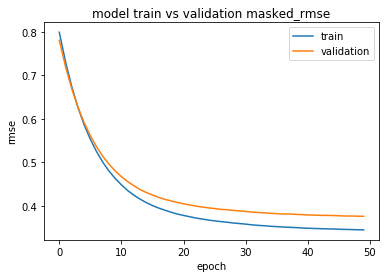

In [114]:
show_rmse(train_hist, 0)